<a href="https://colab.research.google.com/github/blackseashark5/Adobe-Gensolve/blob/main/Copy_of_Adobefrag0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs


In [ ]:
import matplotlib.pyplot as plt

def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Color cycle for different shapes
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()


In [ ]:
from scipy.spatial import distance

def is_straight_line(XY, tolerance=1e-2):
    # Check if all points lie on a straight line
    if len(XY) < 2:
        return False
    x0, y0 = XY[0]
    x1, y1 = XY[-1]
    distances = np.abs((x1 - x0) * (y0 - XY[:, 1]) - (x0 - XY[:, 0]) * (y1 - y0)) / distance.euclidean((x0, y0), (x1, y1))
    return np.all(distances < tolerance)

def is_circle(XY, tolerance=1e-2):
    # Check if all points are equidistant from a center
    if len(XY) < 3:
        return False
    center = np.mean(XY, axis=0)
    radii = np.linalg.norm(XY - center, axis=1)
    return np.std(radii) < tolerance

def regularize_curves(paths_XYs):
    regular_shapes = []
    for XYs in paths_XYs:
        for XY in XYs:
            if is_straight_line(XY):
                regular_shapes.append(('line', XY))
            elif is_circle(XY):
                regular_shapes.append(('circle', XY))
            # Add more shape detection logic here...
    return regular_shapes


In [ ]:
def is_symmetric(XY, tolerance=1e-2):
    # Check for reflection symmetry
    mid_x = (np.max(XY[:, 0]) + np.min(XY[:, 0])) / 2
    reflected_XY = np.copy(XY)
    reflected_XY[:, 0] = 2 * mid_x - reflected_XY[:, 0]
    return np.mean(np.min(distance.cdist(XY, reflected_XY), axis=1)) < tolerance

def detect_symmetry(paths_XYs):
    symmetric_shapes = []
    for XYs in paths_XYs:
        for XY in XYs:
            if is_symmetric(XY):
                symmetric_shapes.append(XY)
    return symmetric_shapes


In [ ]:
from scipy.interpolate import splprep, splev

def complete_curve(XY, num_points=100):
    tck, _ = splprep([XY[:, 0], XY[:, 1]], s=0)
    u_new = np.linspace(0, 1, num_points)
    x_new, y_new = splev(u_new, tck, der=0)
    return np.vstack([x_new, y_new]).T

def complete_curves(paths_XYs):
    completed_shapes = []
    for XYs in paths_XYs:
        for XY in XYs:
            completed_XY = complete_curve(XY)
            completed_shapes.append(completed_XY)
    return completed_shapes


In [ ]:
!pip install svgwrite cairosvg


In [ ]:
import svgwrite
import cairosvg

def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)
    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], XY[0, 1])))
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill=c, stroke='none', stroke_width=2))
    dwg.add(group)
    dwg.save()

    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, output_width=fact * W, output_height=fact * H, background_color='white')

    return


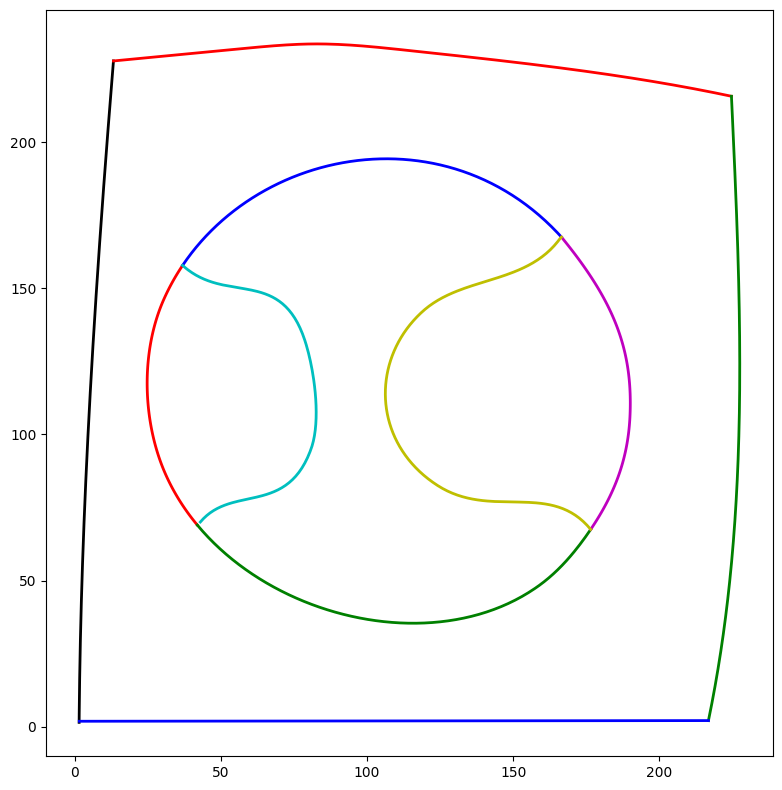

In [ ]:
def main():
    # Example paths
    csv_path = 'frag0.csv'
    paths_XYs = read_csv(csv_path)
    plot(paths_XYs)

    regular_shapes = regularize_curves(paths_XYs)
    symmetric_shapes = detect_symmetry(paths_XYs)
    completed_shapes = complete_curves(paths_XYs)

    output_svg_path = 'frag0.svg'


if __name__ == '__main__':
    main()


In [ ]:
import numpy as np
import svgwrite
import cairosvg

def read_csv(csv_path):
    csv_path = 'frag0.csv'
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            if XY.shape[1] < 2:
                print(f"Unexpected shape in XY: {XY.shape}")
                continue
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)
    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    colours = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black']

    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            if XY.shape[1] < 2:
                print(f"Skipping malformed XY: {XY}")
                continue
            path_data.append(("M", (XY[0, 0], XY[0, 1])))
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill=c, stroke='none', stroke_width=2))
    dwg.add(group)
    dwg.save()

    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, output_width=fact * W, output_height=fact * H, background_color='white')

    return

def main():
    paths_XYs = read_csv('frag0.csv')  # Use the sample CSV file
    polylines2svg(paths_XYs, 'output.svg')

if __name__ == '__main__':
    main()


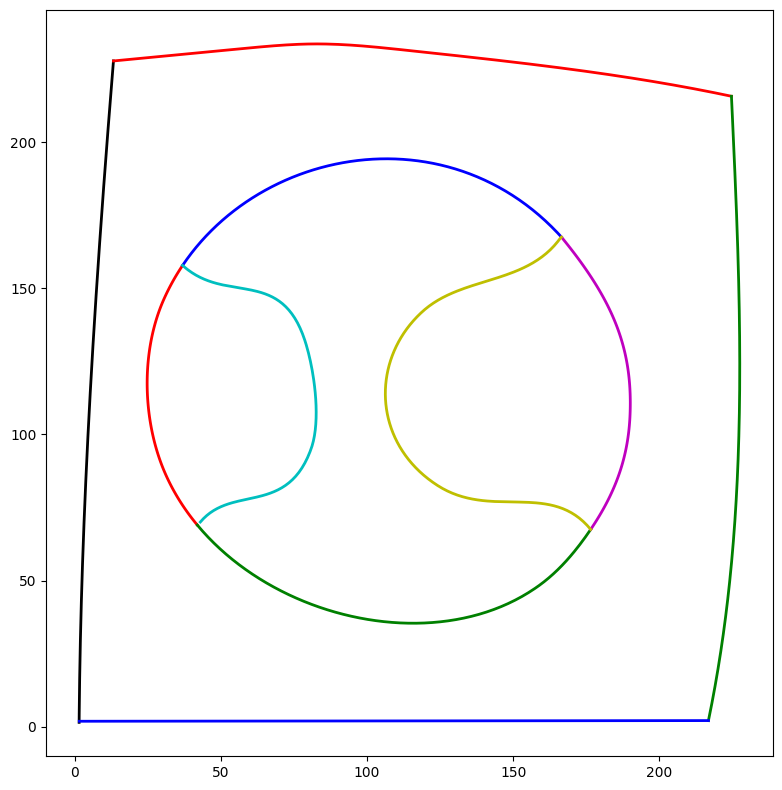

In [ ]:
def main():
    # Example paths
    csv_path = 'frag0.csv'
    paths_XYs = read_csv(csv_path)
    plot(paths_XYs)

    regular_shapes = regularize_curves(paths_XYs)
    symmetric_shapes = detect_symmetry(paths_XYs)
    completed_shapes = complete_curves(paths_XYs)

    output_svg_path = 'frag0.svg'


if __name__ == '__main__':
    main()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.interpolate import splprep, splev
import svgwrite
import cairosvg


In [ ]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def is_straight_line(XY, tolerance=1e-2):
    if len(XY) < 2:
        return False
    x0, y0 = XY[0]
    x1, y1 = XY[-1]
    distances = np.abs((x1 - x0) * (y0 - XY[:, 1]) - (x0 - XY[:, 0]) * (y1 - y0)) / distance.euclidean((x0, y0), (x1, y1))
    return np.all(distances < tolerance)

def is_circle(XY, tolerance=1e-2):
    if len(XY) < 3:
        return False
    center = np.mean(XY, axis=0)
    radii = np.linalg.norm(XY - center, axis=1)
    return np.std(radii) < tolerance

def is_symmetric(XY, tolerance=1e-2):
    if len(XY) < 2:
        return False
    mid_x = (np.max(XY[:, 0]) + np.min(XY[:, 0])) / 2
    reflected_XY = np.copy(XY)
    reflected_XY[:, 0] = 2 * mid_x - reflected_XY[:, 0]
    distances = np.min(distance.cdist(XY, reflected_XY), axis=1)
    return np.mean(distances) < tolerance

def regularize_curves(paths_XYs):
    regular_shapes = []
    for XYs in paths_XYs:
        for XY in XYs:
            if is_straight_line(XY):
                regular_shapes.append(('line', XY))
            elif is_circle(XY):
                regular_shapes.append(('circle', XY))
    return regular_shapes

def complete_curve(XY, num_points=100):
    if len(XY) < 2:
        return XY
    tck, _ = splprep([XY[:, 0], XY[:, 1]], s=0)
    u_new = np.linspace(0, 1, num_points)
    x_new, y_new = splev(u_new, tck, der=0)
    return np.vstack([x_new, y_new]).T

def complete_curves(paths_XYs):
    completed_shapes = []
    for XYs in paths_XYs:
        for XY in XYs:
            completed_XY = complete_curve(XY)
            completed_shapes.append(('completed', completed_XY))
    return completed_shapes

def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            if XY.shape[1] < 2:
                print(f"Unexpected shape in XY: {XY.shape}")
                continue
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)
    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    colours = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black']

    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            if XY.shape[1] < 2:
                print(f"Skipping malformed XY: {XY}")
                continue
            path_data.append(("M", (XY[0, 0], XY[0, 1])))
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill=c, stroke='none', stroke_width=2))
    dwg.add(group)
    dwg.save()

    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, output_width=fact * W, output_height=fact * H, background_color='white')

    return


In [ ]:
def plot(paths_XYs, ax, title="Paths", color='blue'):
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            ax.plot(XY[:, 0], XY[:, 1], color=color, linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

def plot_shapes(shapes, title, ax):
    if not shapes:
        ax.text(0.5, 0.5, f'No {title.lower()} detected', horizontalalignment='center', verticalalignment='center', fontsize=12, color='gray')
    else:
        for shape, XY in shapes:
            ax.plot(XY[:, 0], XY[:, 1], label=shape, linewidth=2)
        ax.set_aspect('equal')
        ax.set_title(title)
        ax.legend()



Read 10 paths from frag0.csv


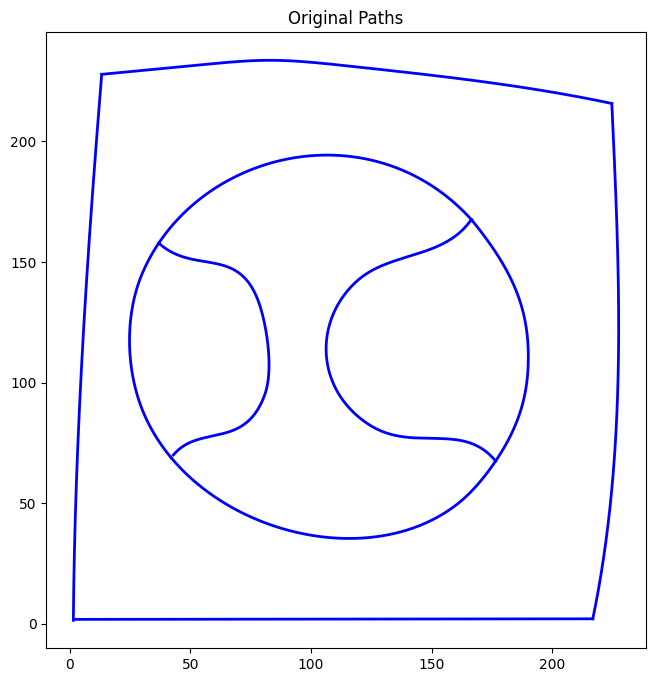

In [ ]:
csv_path = 'frag0.csv'
paths_XYs = read_csv(csv_path)
print(f"Read {len(paths_XYs)} paths from {csv_path}")

fig, ax = plt.subplots(figsize=(8, 8))
plot(paths_XYs, ax, "Original Paths")
plt.show()


In [ ]:
def is_straight_line(XY, tolerance=1e-2):
    if len(XY) < 2:
        return False
    # Fit a line and check the distance of points to this line
    A = np.vstack([XY[:, 0], np.ones(len(XY))]).T
    m, c = np.linalg.lstsq(A, XY[:, 1], rcond=None)[0]
    distances = np.abs(XY[:, 1] - (m * XY[:, 0] + c))
    return np.all(distances < tolerance)


In [ ]:
def is_circle(XY, tolerance=1e-2):
    if len(XY) < 3:
        return False
    # Use a geometric method to estimate circle parameters
    A = np.c_[2*XY[:, 0], 2*XY[:, 1], np.ones(len(XY))]
    b = XY[:, 0]**2 + XY[:, 1]**2
    x, y, _ = np.linalg.lstsq(A, b, rcond=None)[0]
    center = np.array([x, y])
    radii = np.linalg.norm(XY - center, axis=1)
    return np.std(radii) < tolerance


Read 10 paths from frag0.csv


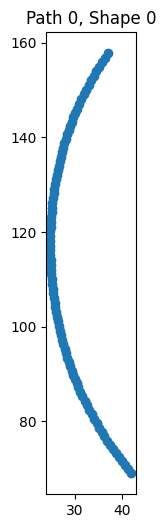

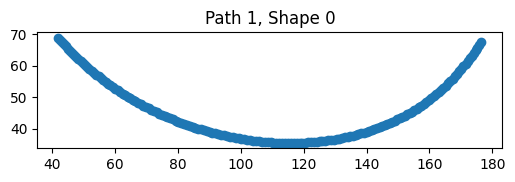

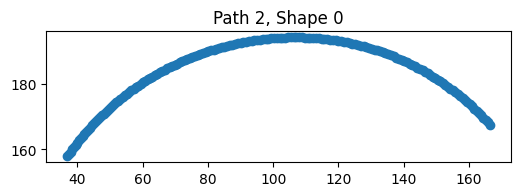

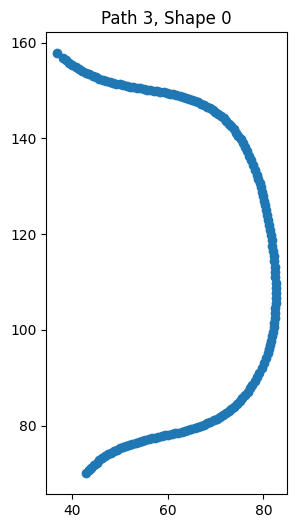

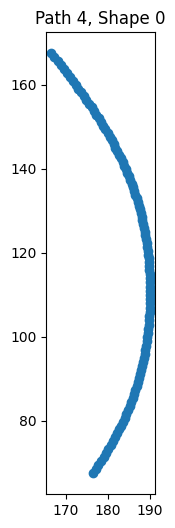

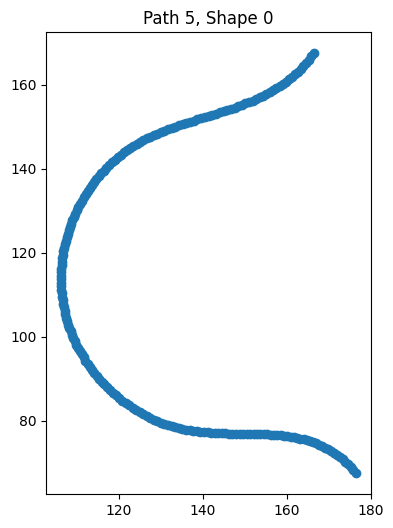

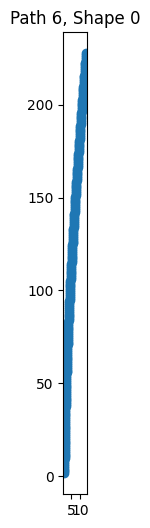

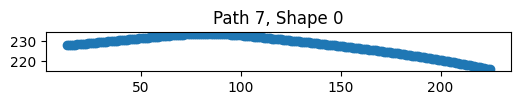

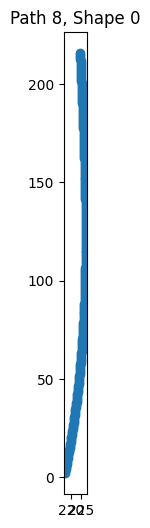

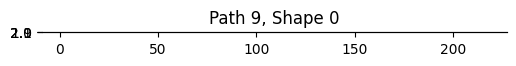

In [ ]:
# Cell 1: Read Paths and Debug Shapes
import matplotlib.pyplot as plt

def main_read_and_debug():
    csv_path = 'frag0.csv'
    paths_XYs = read_csv(csv_path)
    print(f"Read {len(paths_XYs)} paths from {csv_path}")

    # Plot individual shapes to debug
    plot_individual_shapes(paths_XYs)
    return paths_XYs

paths_XYs = main_read_and_debug()


Processing shape with 94 points.
Shape with 94 points is neither line nor circle.
Processing shape with 166 points.
Shape with 166 points is neither line nor circle.
Processing shape with 171 points.
Shape with 171 points is neither line nor circle.
Processing shape with 166 points.
Shape with 166 points is neither line nor circle.
Processing shape with 109 points.
Shape with 109 points is neither line nor circle.
Processing shape with 205 points.
Shape with 205 points is neither line nor circle.
Processing shape with 226 points.
Shape with 226 points is neither line nor circle.
Processing shape with 208 points.
Shape with 208 points is neither line nor circle.
Processing shape with 215 points.
Shape with 215 points is neither line nor circle.
Processing shape with 215 points.
Detected straight line with 215 points.
Regular shapes detected: 1


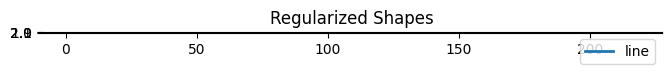

In [ ]:
# Cell 2: Regularize Curves and Plot Regularized Shapes
def main_regularize_and_plot(paths_XYs):
    regular_shapes = regularize_curves(paths_XYs)
    print(f"Regular shapes detected: {len(regular_shapes)}")

    fig, ax = plt.subplots(figsize=(8, 8))
    if regular_shapes:
        plot_shapes(regular_shapes, "Regularized Shapes", ax)
    else:
        ax.text(0.5, 0.5, 'No regular shapes detected', horizontalalignment='center', verticalalignment='center', fontsize=12, color='gray')
    plt.title("Regularized Shapes")
    plt.show()

main_regularize_and_plot(paths_XYs)


In [ ]:
def is_symmetric(XY, tolerance=1e-2):
    # Check for reflection symmetry
    if len(XY) < 2:
        return False

    # Calculate the midpoint of the bounding box
    min_x, max_x = np.min(XY[:, 0]), np.max(XY[:, 0])
    mid_x = (min_x + max_x) / 2

    # Reflect points over the vertical axis through the midpoint
    reflected_XY = np.copy(XY)
    reflected_XY[:, 0] = 2 * mid_x - reflected_XY[:, 0]

    # Compare the distances between original and reflected points
    dist = np.min(distance.cdist(XY, reflected_XY), axis=1)
    return np.all(dist < tolerance)



Symmetric shapes detected: 0


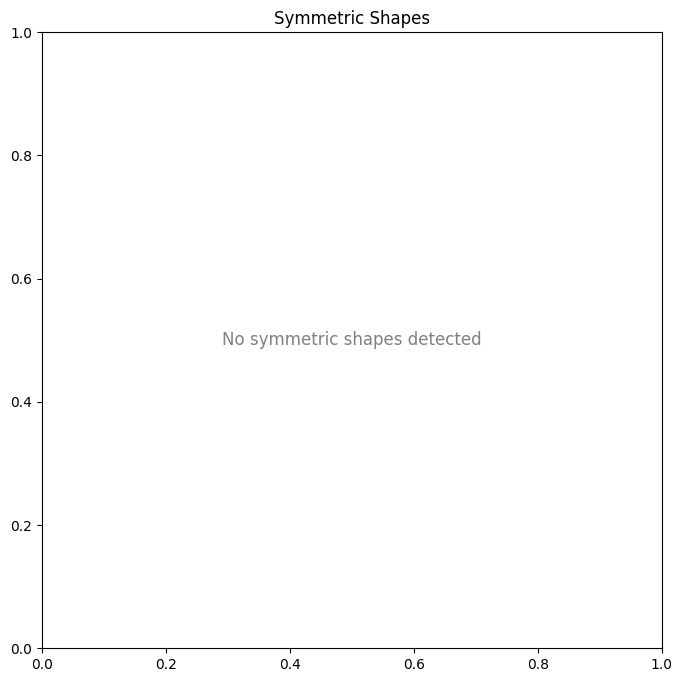

In [ ]:
# Cell 3: Detect and Plot Symmetric Shapes
def main_detect_and_plot_symmetric(paths_XYs):
    symmetric_shapes = detect_symmetry(paths_XYs)
    print(f"Symmetric shapes detected: {len(symmetric_shapes)}")

    fig, ax = plt.subplots(figsize=(8, 8))
    if symmetric_shapes:
        plot_shapes(symmetric_shapes, "Symmetric Shapes", ax)
    else:
        ax.text(0.5, 0.5, 'No symmetric shapes detected', horizontalalignment='center', verticalalignment='center', fontsize=12, color='gray')
    plt.title("Symmetric Shapes")
    plt.show()

# Execute the function
main_detect_and_plot_symmetric(paths_XYs)


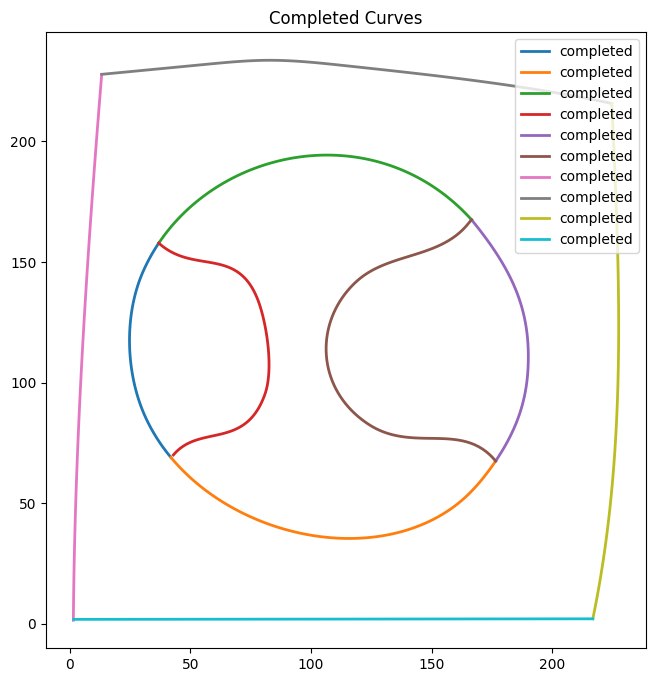

In [ ]:
# Cell 4: Complete Curves and Plot Completed Curves
def main_complete_and_plot(paths_XYs):
    completed_shapes = complete_curves(paths_XYs)
    fig, ax = plt.subplots(figsize=(8, 8))
    if completed_shapes:
        plot_shapes(completed_shapes, "Completed Curves", ax)
    else:
        ax.text(0.5, 0.5, 'No completed curves detected', horizontalalignment='center', verticalalignment='center', fontsize=12, color='gray')
    plt.title("Completed Curves")
    plt.show()

main_complete_and_plot(paths_XYs)
